In [1]:
import pandas as pd

In [2]:
batting_df = pd.read_csv('../combined_data/batting_combined.csv')

In [3]:
batting_df['missing_value_count'] = batting_df.isnull().sum(axis=1)

In [4]:
# grouped_by_year_df = batting_df.groupby('Year').mean().reset_index()
# grouped_by_year_df

numeric_columns = batting_df.select_dtypes(include='number').columns
grouped_by_year_df = batting_df.groupby('Year', as_index=False)[numeric_columns].mean()
grouped_by_year_df

,Year,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,...,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB,missing_value_count
0,1871.0,12.777778,23.522222,10.348889,28.222222,1246.111111,1202.444444,295.444444,344.555556,48.222222,...,0.688222,96.111111,461.555556,8.222222,NaN,NaN,NaN,NaN,NaN,6.000000
1,1875.0,16.500000,24.214286,5.444286,53.071429,2083.214286,2064.071429,325.714286,524.000000,64.571429,...,0.534000,85.214286,639.785714,10.928571,NaN,NaN,NaN,NaN,NaN,6.000000
2,1876.0,15.500000,25.350000,5.876250,65.000000,2557.125000,2515.125000,383.250000,667.250000,79.125000,...,0.593750,96.875000,806.625000,NaN,NaN,NaN,NaN,NaN,NaN,8.000000
3,1880.0,16.875000,24.812500,4.687500,85.000000,3130.125000,3037.625000,398.875000,743.250000,122.500000,...,0.585750,96.875000,971.000000,NaN,NaN,NaN,NaN,NaN,NaN,8.000000
4,1885.0,21.875000,26.616667,5.302917,111.250000,4175.333333,3930.291667,590.708333,962.250000,134.125000,...,0.614333,95.208333,1281.875000,NaN,41.625000,NaN,NaN,NaN,NaN,7.333333
5,1890.0,22.690476,27.073810,6.057143,127.571429,5019.785714,4497.595238,779.904762,1176.333333,167.714286,...,0.686214,93.523810,1587.404762,NaN,53.785714,NaN,NaN,NaN,NaN,6.000000
6,1895.0,25.416667,27.908333,6.599167,132.833333,5297.750000,4732.333333,876.166667,1402.250000,201.166667,...,0.760667,95.583333,1891.583333,NaN,55.666667,83.083333,NaN,NaN,NaN,5.000000
7,1900.0,24.375000,28.512500,5.227500,142.000000,5435.625000,4891.500000,741.500000,1365.625000,179.000000,...,0.705250,94.125000,1791.625000,NaN,64.125000,100.750000,NaN,NaN,NaN,5.000000
8,1905.0,25.250000,28.668750,3.895000,154.625000,5738.812500,5115.125000,602.187500,1268.625000,178.625000,...,0.629687,93.250000,1650.625000,NaN,51.125000,156.500000,NaN,NaN,1009.812500,4.000000
9,1910.0,33.562500,27.300000,3.836250,156.125000,5825.250000,5096.937500,598.562500,1270.750000,175.937500,...,0.643375,94.062500,1659.375000,NaN,49.437500,188.750000,NaN,NaN,993.937500,4.000000


# Notes:
# Yosef- I used altair to create the same plot. We are able to see the same information, but in a more interactive way.

In [7]:
import altair as alt

grouped_by_league_year_df = batting_df.groupby(['League', 'Year'])['missing_value_count'].mean().reset_index()

chart = alt.Chart(grouped_by_league_year_df).mark_line(point=True).encode(
    x='Year:O',
    y='missing_value_count:Q',
    color='League:N',
    tooltip=['League', 'Year', 'missing_value_count']
).properties(
    title='Average Missing Values Over Time by League - Altair',
    width=800,
    height=400
).interactive()

chart

alt.Chart(...)

In [35]:
# # Plot the average batting age over time
# plt.figure(figsize=(10, 6))
# plt.plot(grouped_by_year_df['Year'], grouped_by_year_df['BatAge'], marker='o')
# plt.title('Average Batting Age Over Time')
# plt.xlabel('Year')
# plt.ylabel('Average Batting Age')
# plt.grid(True)
# plt.show()

# # Plot the average runs per game over time
# plt.figure(figsize=(10, 6))
# plt.plot(grouped_by_year_df['Year'], grouped_by_year_df['R/G'], marker='o')
# plt.title('Average Runs Per Game Over Time')
# plt.xlabel('Year')
# plt.ylabel('Average Runs Per Game')
# plt.grid(True)
# plt.show()

# # Plot the average number of home runs over time
# plt.figure(figsize=(10, 6))
# plt.plot(grouped_by_year_df['Year'], grouped_by_year_df['HR'], marker='o')
# plt.title('Average Number of Home Runs Over Time')
# plt.xlabel('Year')
# plt.ylabel('Average Number of Home Runs')
# plt.grid(True)
# plt.show()

In [36]:
# import altair as alt

# # Create an Altair chart for the average batting age over time
# bat_age_chart = alt.Chart(grouped_by_year_df).mark_line(point=True).encode(
#     x='Year:O',
#     y='BatAge:Q',
#     tooltip=['Year', 'BatAge']
# ).properties(
#     title='Average Batting Age Over Time - Altair',
#     width=800,
#     height=400
# ).interactive()

# # Create an Altair chart for the average runs per game over time
# runs_per_game_chart = alt.Chart(grouped_by_year_df).mark_line(point=True).encode(
#     x='Year:O',
#     y='R/G:Q',
#     tooltip=['Year', 'R/G']
# ).properties(
#     title='Average Runs Per Game Over Time - Altair',
#     width=800,
#     height=400
# ).interactive()

# # Create an Altair chart for the average number of home runs over time
# home_runs_chart = alt.Chart(grouped_by_year_df).mark_line(point=True).encode(
#     x='Year:O',
#     y='HR:Q',
#     tooltip=['Year', 'HR']
# ).properties(
#     title='Average Number of Home Runs Over Time - Altair',
#     width=800,
#     height=400
# ).interactive()

# # Display the charts
# bat_age_chart & runs_per_game_chart & home_runs_chart

## Players League

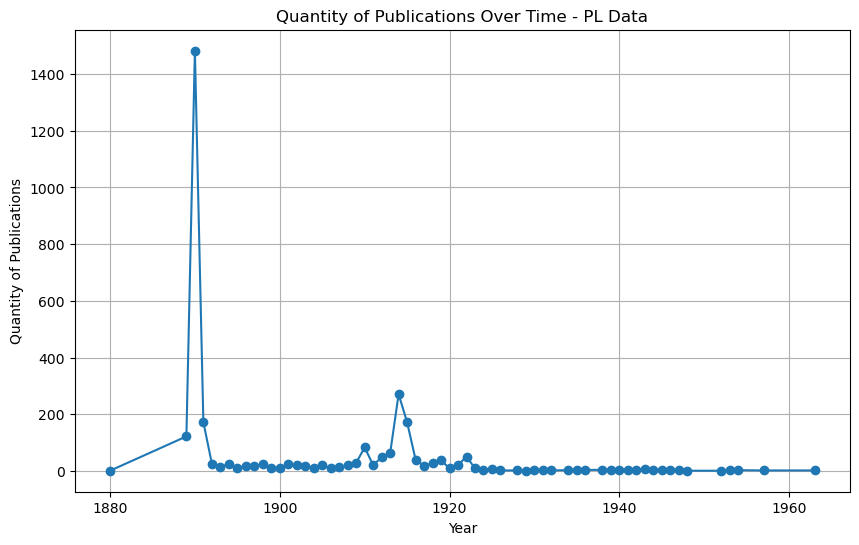

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
pl_data_df = pd.read_csv('../chroniclingamerica_csv/pl_data.csv')

# Ensure the 'Date' column is in datetime format
pl_data_df['Date'] = pd.to_datetime(pl_data_df['date'])

# Group by year and count the number of publications
pl_data_df['Year'] = pl_data_df['Date'].dt.year
publications_per_year = pl_data_df.groupby('Year').size().reset_index(name='Quantity')

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(publications_per_year['Year'], publications_per_year['Quantity'], marker='o')
plt.title('Quantity of Publications Over Time - PL Data')
plt.xlabel('Year')
plt.ylabel('Quantity of Publications')
plt.grid(True)
plt.show()

In [34]:
import pandas as pd
import altair as alt

# Load the data
pl_data_df = pd.read_csv('../chroniclingamerica_csv/pl_data.csv')

# Ensure the 'Date' column is in datetime format
pl_data_df['Date'] = pd.to_datetime(pl_data_df['date'])

# Group by year and count the number of publications
pl_data_df['Year'] = pl_data_df['Date'].dt.year
publications_per_year = pl_data_df.groupby('Year').size().reset_index(name='Quantity')

# Create the Altair chart
chart = alt.Chart(publications_per_year).mark_line(point=True).encode(
    x='Year:O',
    y='Quantity:Q',
    tooltip=['Year', 'Quantity']
).properties(
    title='Quantity of Publications Over Time - Altair PL Data',
    width=800,
    height=400
).interactive()

chart

alt.Chart(...)